# PART-1

# EDA & Data Preprocessing on Google App Store Rating Dataset.


# Domain: Mobile device apps
Context:
The Play Store apps data has enormous potential to drive app-making businesses to success. However, many
apps are being developed every single day and only a few of them become profitable. It is important for
developers to be able to predict the success of their app and incorporate features which makes an app
successful. Before any such predictive-study can be done, it is necessary to do EDA and data-preprocessing on
the apps data available for google app store applications. From the collected apps data and user ratings from
the app stores, let's try to extract insightful information.

# Objective:
The Goal is to explore the data and pre-process it for future use in any predictive analytics study.
Data set Information:
Web scraped data of 10k Play Store apps for analyzing the Android market. Each app (row) has values for
category, rating, size, and more.


# 1. Import required libraries and read the dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_1=pd.read_csv("C:\\Users\\hp\\Downloads\\Apps_data+(1).csv")

# 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [5]:
df_1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
df_1.shape

(10841, 13)

In [8]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
df_1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [10]:
df_1.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [14]:
df_1.describe(include='O').T

,count,unique,top,freq
App,10841,9660,ROBLOX,9
Category,10841,34,FAMILY,1972
Reviews,10841,6002,0,596
Size,10841,462,Varies with device,1695
Installs,10841,22,"1,000,000+",1579
Type,10840,3,Free,10039
Price,10841,93,0,10040
Content Rating,10840,6,Everyone,8714
Genres,10841,120,Tools,842
Last Updated,10841,1378,"August 3, 2018",326


# 4. Check if there are any duplicate records in the dataset? if any drop them.

In [15]:
df_11=df_1.drop_duplicates()
df_11

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [16]:
u_c = df_11['Category'].unique()

In [17]:
u_c

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [18]:
df_12 = df_11[df_11['Category'].isin(invalid_categories)]

NameError: name 'invalid_categories' is not defined

In [20]:
df_11

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [21]:
missing_mask = df_11['Rating'].isnull()

In [22]:
missing_mask

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838     True
10839    False
10840    False
Name: Rating, Length: 10358, dtype: bool

In [23]:
df_11.dropna(subset=['Rating'], inplace=True)
df_11

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [24]:
df_11['Rating_category'] = df_11['Rating'].apply(lambda x: 'high' if x > 3.5 else 'low')


In [25]:
df_11

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,high
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,high
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,high
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,high


# 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

In [27]:
rating_counts = df_11['Rating_category'].value_counts()
rating_counts

high    8013
low      880
Name: Rating_category, dtype: int64

# Distribution
It's also worth noting that the distribution of the 'Rating_category' column may be influenced by factors such as the size of the dataset and the underlying distribution of ratings. It's always a good idea to carefully examine the distribution of any new variables or features created from data to ensure they are behaving as expected.

# 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [28]:
df_11['Reviews'] = pd.to_numeric(df_11['Reviews'], errors='coerce')

In [29]:
df_11

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,high
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,high
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,high
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,high


In [30]:
df_11.dtypes

App                 object
Category            object
Rating             float64
Reviews            float64
Size                object
Installs            object
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Rating_category     object
dtype: object

In [31]:
review_stats = df_11['Reviews'].describe()

In [32]:
review_stats

count    8.892000e+03
mean     4.727764e+05
std      2.905052e+06
min      1.000000e+00
25%      1.640000e+02
50%      4.714500e+03
75%      7.126675e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [36]:
df_11['Reviews_log'] = np.log(df_11['Reviews'])


In [37]:
df_11.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category,Reviews_log
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high,5.068904
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high,6.874198
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high,11.379508
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high,12.281384
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high,6.874198


# 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [38]:
replace_dict = {'M': '1000000','K':'1000'}
df_11['Size'] = df_11['Size'].replace(replace_dict, regex=True)
df_11.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category,Reviews_log
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,191000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high,5.068904
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,141000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high,6.874198
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.71000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high,11.379508
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,251000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high,12.281384
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.81000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high,6.874198


In [39]:
df_11['Size'] = pd.to_numeric(df_11['Size'], errors='coerce')

In [40]:
df_11

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category,Reviews_log
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,1.910000e+08,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high,5.068904
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,1.410000e+08,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high,6.874198
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.710000e+00,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high,11.379508
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,2.510000e+08,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high,12.281384
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.810000e+00,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high,6.874198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2.610000e+00,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,high,1.945910
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,5.310000e+08,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,high,3.637586
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.610000e+00,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,high,1.386294
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,high,4.736198


In [41]:
df_11 = df_11.drop(df_11[df_11['Size'] == 'Varies with device'].index)

In [42]:
df_11['Size'].dtypes

dtype('float64')

In [44]:
df_11

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category,Reviews_log
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,1.910000e+08,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high,5.068904
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,1.410000e+08,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high,6.874198
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.710000e+00,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high,11.379508
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,2.510000e+08,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high,12.281384
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.810000e+00,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high,6.874198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2.610000e+00,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,high,1.945910
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,5.310000e+08,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,high,3.637586
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.610000e+00,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,high,1.386294
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,high,4.736198


# 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [45]:
df_11['Installs'].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [46]:
df_11['Installs'] = df_11['Installs'].str.replace(',', '')
df_11['Installs'] = df_11['Installs'].str.replace('+', '')
df_11['Installs'] = df_11['Installs'].str.replace('Free', '0')

In [47]:
df_11['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: object

In [48]:
df_11['Installs'].info()

<class 'pandas.core.series.Series'>
Int64Index: 8893 entries, 0 to 10840
Series name: Installs
Non-Null Count  Dtype 
--------------  ----- 
8893 non-null   object
dtypes: object(1)
memory usage: 139.0+ KB


In [49]:
df_11['Installs'] = df_11['Installs'].astype(int)

In [50]:
df_11['Installs'].info()

<class 'pandas.core.series.Series'>
Int64Index: 8893 entries, 0 to 10840
Series name: Installs
Non-Null Count  Dtype
--------------  -----
8893 non-null   int32
dtypes: int32(1)
memory usage: 104.2 KB


# 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [51]:
df_11['Price'].head()

0    0
1    0
2    0
3    0
4    0
Name: Price, dtype: object

In [52]:
df_11['Price'].info()

<class 'pandas.core.series.Series'>
Int64Index: 8893 entries, 0 to 10840
Series name: Price
Non-Null Count  Dtype 
--------------  ----- 
8893 non-null   object
dtypes: object(1)
memory usage: 139.0+ KB


In [53]:
df_11['Price'] = df_11['Price'].str.replace('$', '')
df_11['Price'] = df_11['Price'].str.replace('Everyone', '')
df_11['Price'] = df_11['Price'].str.replace('', '0')

In [54]:
df_11['Price'] = df_11['Price'].astype(float)

In [55]:
df_11['Price'].info()

<class 'pandas.core.series.Series'>
Int64Index: 8893 entries, 0 to 10840
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
8893 non-null   float64
dtypes: float64(1)
memory usage: 139.0 KB


# 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [56]:
df_11.drop(['App', 'Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1, inplace=True)

In [57]:
df_11

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category,Reviews_log
0,ART_AND_DESIGN,159.0,1.910000e+08,10000,Free,0.0,Everyone,high,5.068904
1,ART_AND_DESIGN,967.0,1.410000e+08,500000,Free,0.0,Everyone,high,6.874198
2,ART_AND_DESIGN,87510.0,8.710000e+00,5000000,Free,0.0,Everyone,high,11.379508
3,ART_AND_DESIGN,215644.0,2.510000e+08,50000000,Free,0.0,Teen,high,12.281384
4,ART_AND_DESIGN,967.0,2.810000e+00,100000,Free,0.0,Everyone,high,6.874198
...,...,...,...,...,...,...,...,...,...
10834,FAMILY,7.0,2.610000e+00,500,Free,0.0,Everyone,high,1.945910
10836,FAMILY,38.0,5.310000e+08,5000,Free,0.0,Everyone,high,3.637586
10837,FAMILY,4.0,3.610000e+00,100,Free,0.0,Everyone,high,1.386294
10839,BOOKS_AND_REFERENCE,114.0,NaN,1000,Free,0.0,Mature 17+,high,4.736198


# 13. Encode the categorical columns.

In [58]:
from sklearn.preprocessing import LabelEncoder

In [60]:
le = LabelEncoder()

# Encode categorical columns
df_11['Category'] = le.fit_transform(df_11['Category'])
df_11['Type'] = le.fit_transform(df_11['Type'])
df_11['Content Rating'] = le.fit_transform(df_11['Content Rating'])

In [61]:
df_11.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category,Reviews_log
0,1,159.0,1.910000e+08,10000,1,0.0,1,high,5.068904
1,1,967.0,1.410000e+08,500000,1,0.0,1,high,6.874198
2,1,87510.0,8.710000e+00,5000000,1,0.0,1,high,11.379508
3,1,215644.0,2.510000e+08,50000000,1,0.0,4,high,12.281384
4,1,967.0,2.810000e+00,100000,1,0.0,1,high,6.874198


# 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [62]:
X = df_11.drop(['Rating_category'], axis=1)
y = df_11['Rating_category']
df_11.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category,Reviews_log
0,1,159.0,1.910000e+08,10000,1,0.0,1,high,5.068904
1,1,967.0,1.410000e+08,500000,1,0.0,1,high,6.874198
2,1,87510.0,8.710000e+00,5000000,1,0.0,1,high,11.379508
3,1,215644.0,2.510000e+08,50000000,1,0.0,4,high,12.281384
4,1,967.0,2.810000e+00,100000,1,0.0,1,high,6.874198


# 15.Split the dataset into train and test

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 16. Standardize the data, so that the values are within a particular range

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
X_train_scaled

array([[-0.71068591, -0.16051489, -0.86761262, ..., -0.04316404,
        -0.46385036,  0.4111542 ],
       [ 0.37596395, -0.16738267, -0.18031368, ..., -0.04316404,
         1.52101065, -1.09324489],
       [ 0.73818057, -0.16734766, -0.2205066 , ..., -0.04316404,
        -0.46385036, -0.83462984],
       ...,
       [-0.71068591, -0.08988865,  1.30682446, ..., -0.04316404,
        -0.46385036,  1.03626957],
       [-0.58994704, -0.15912281, -0.30089245, ..., -0.04316404,
        -0.46385036,  0.45868832],
       [-0.46920817, -0.16355389,  0.58335185, ..., -0.04316404,
        -0.46385036,  0.26086929]])

In [66]:
X_test_scaled

array([[-0.34846929, -0.09153633,  1.86952538, ..., -0.04316404,
         2.51344116,  1.0307211 ],
       [-0.71068591, -0.13977077, -0.86761263, ..., -0.04316404,
        -0.46385036,  0.76989912],
       [ 0.49670282, -0.1673917 , -0.86761264, ..., -0.04316404,
        -0.46385036, -1.24503549],
       ...,
       [-0.58994704, -0.16734314, -0.30089245, ..., -0.04316404,
        -0.46385036, -0.81436525],
       [-0.71068591, -0.16489252,  0.38238724, ..., -0.04316404,
        -0.46385036,  0.15050594],
       [-0.71068591, -0.16739923,  2.07048999, ..., -0.04014027,
        -0.46385036, -1.5287422 ]])

# PART-2

# Data Visualization on Honey Production dataset using seaborn and matplotlib libraries.

# Domain: Food and agriculture

Context:
In 2006, a global concern was raised over the rapid decline in the honeybee population, an integral component
to American honey agriculture. Large numbers of hives were lost to “Colony-Collapse-Disorder”, a
phenomenon of disappearing “worker-bees” causing the remaining “hive-colony” to collapse. Speculation
around the cause of this disorder points to hive-diseases and pesticides harming the pollinators, though no
overall consensus has been reached. Twelve years later, some industries are observing recovery but the
American honey industry is still largely struggling. The U.S. used to locally produce over half the honey it
consumes per year. Now, honey mostly comes from overseas, with 350 of the 400 million pounds of honey
consumed every year originating from imports. This dataset provides insight into honey production supply and
demand in America by state from 1998 to 2012.
Objective:
The Goal is to use Python visualization libraries such as seaborn and matplotlib to investigate the data and get
some useful conclusions.

# 1. Import required libraries and read the dataset.

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [69]:
df_2=pd.read_csv("C:\\Users\\hp\\Downloads\\honeyproduction.csv")

# 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [70]:
df_2.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [71]:
df_2.shape

(626, 8)

In [73]:
df_2.info

<bound method DataFrame.info of     state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0      AL   16000.0           71   1136000.0    159000.0        0.72   
1      AZ   55000.0           60   3300000.0   1485000.0        0.64   
2      AR   53000.0           65   3445000.0   1688000.0        0.59   
3      CA  450000.0           83  37350000.0  12326000.0        0.62   
4      CO   27000.0           72   1944000.0   1594000.0        0.70   
..    ...       ...          ...         ...         ...         ...   
621    VA    4000.0           41    164000.0     23000.0        3.77   
622    WA   62000.0           41   2542000.0   1017000.0        2.38   
623    WV    6000.0           48    288000.0     95000.0        2.91   
624    WI   60000.0           69   4140000.0   1863000.0        2.05   
625    WY   50000.0           51   2550000.0    459000.0        1.87   

      prodvalue  year  
0      818000.0  1998  
1     2112000.0  1998  
2     2033000.0  1998  
3    23

In [74]:
df_2.dtypes

state           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object

# 3. Display the percentage distribution of the data in each year using the pie chart.

In [75]:
year_counts = df_2.groupby('year').size()

In [76]:
year_counts

year
1998    43
1999    43
2000    43
2001    44
2002    44
2003    44
2004    41
2005    41
2006    41
2007    41
2008    41
2009    40
2010    40
2011    40
2012    40
dtype: int64

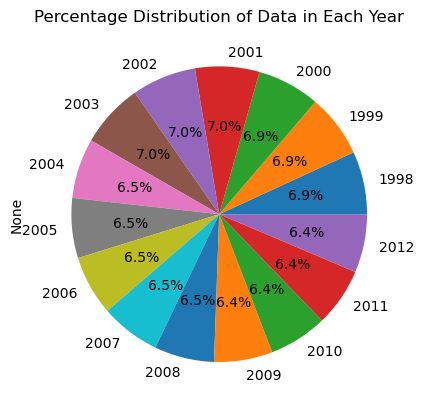

In [77]:
year_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage Distribution of Data in Each Year')
plt.show()

# 4. Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings.

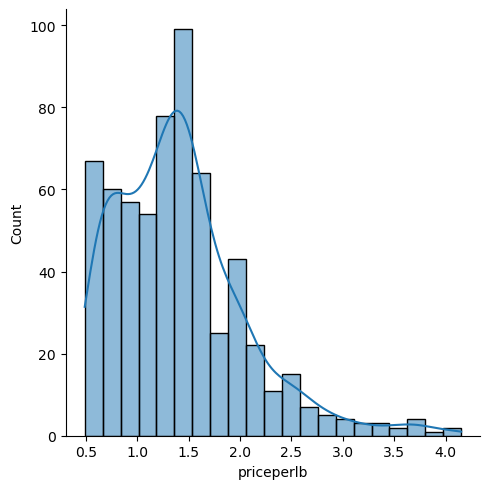

In [78]:
sns.displot(df_2['priceperlb'], kde=True)

# 5. Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot, and write your findings.

<AxesSubplot:xlabel='numcol', ylabel='prodvalue'>

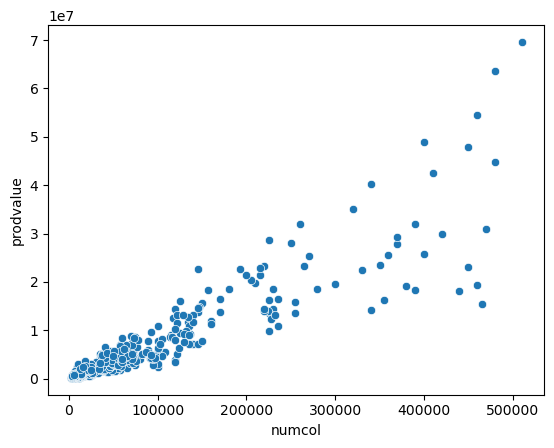

In [79]:
sns.scatterplot(x='numcol', y='prodvalue', data=df_2)

# 7. Visualize and understand the relationship between the multiple pairs of variables throughout different years using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year')

In [82]:
cols = ['numcol', 'yieldpercol', 'totalprod', 'prodvalue', 'year']
df_2 = df_2[cols]

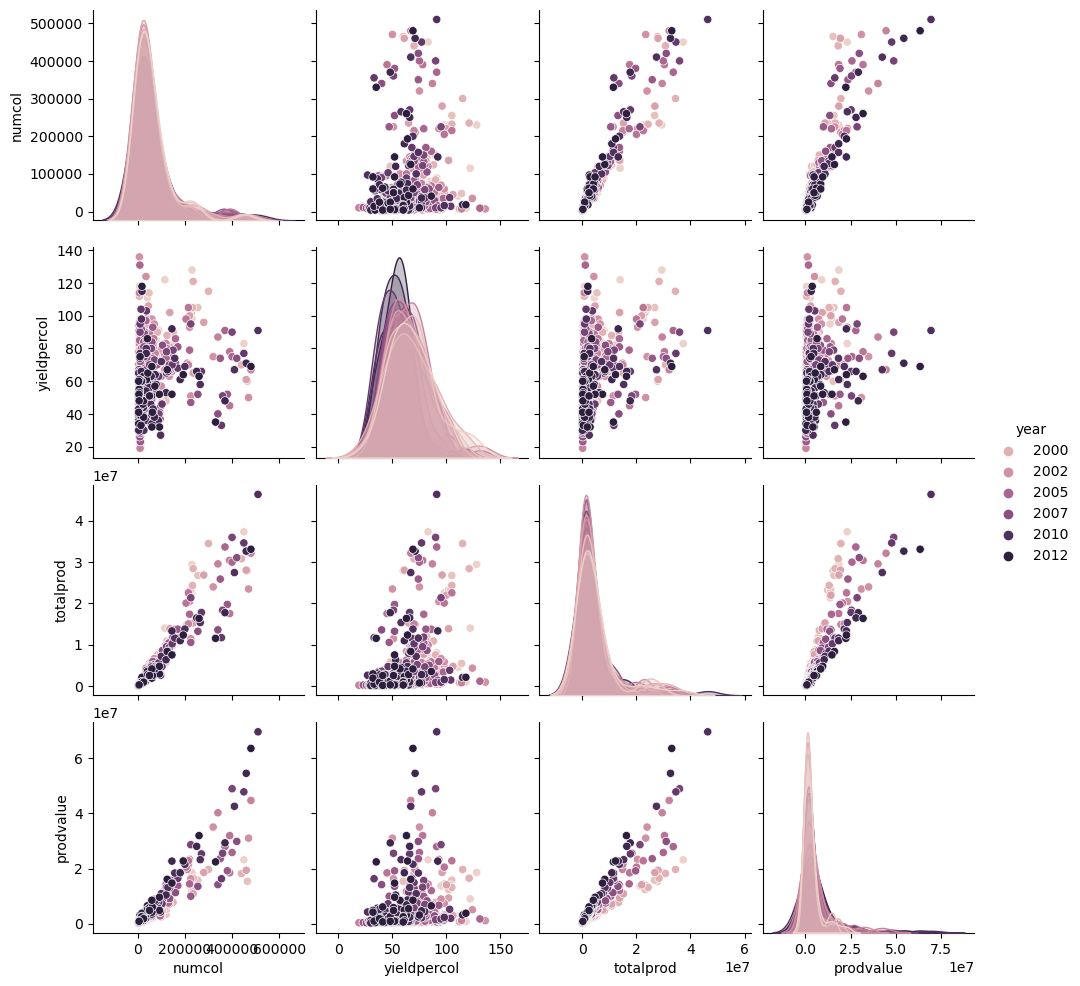

In [83]:
sns.pairplot(data=df_2, hue='year')

# 8. Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'stocks', 'price per lb', 'prodvalue')


In [84]:
corr = df_2[cols].corr()

<AxesSubplot:>

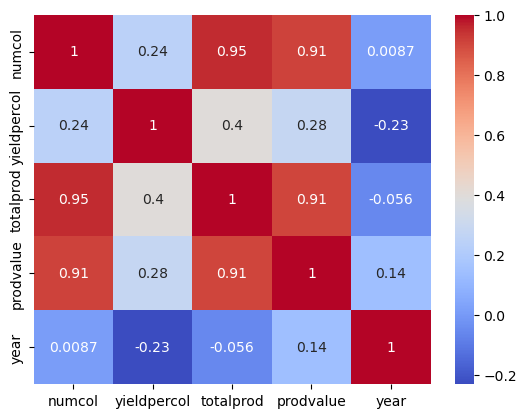

In [85]:
sns.heatmap(corr, annot=True, cmap='coolwarm')